## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics, datasets
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn import tree
from six import StringIO
import pydotplus

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
train_X, test_X, train_y, test_y = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

In [3]:
# 建立模型
clf = DecisionTreeClassifier()

# 擬合數據
clf.fit(train_X, train_y)

# 預測測試數據
pred = clf.predict(test_X)

acc = metrics.accuracy_score(test_y, pred)
print("Acuuracy: ", acc)
print("="*20)

FI = pd.DataFrame()
for i, feature in enumerate(iris.feature_names):
    FI[feature] = [clf.feature_importances_[i]]
print("")
print("Feature Importances：")
FI.index = ["Feature Importance"]
FI

Acuuracy:  0.9736842105263158

Feature Importances：


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Feature Importance,0.017966,0.0,0.059924,0.92211


## 作業1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？

In [4]:
# 建立模型(使用 熵(entropy) 進行訊息增益)
clf = DecisionTreeClassifier(criterion='entropy')

# 擬合數據
clf.fit(train_X, train_y)

# 預測測試數據
pred = clf.predict(test_X)

acc = metrics.accuracy_score(test_y, pred)
print("Acuuracy: ", acc)
print("="*20)

FI = pd.DataFrame()
for i, feature in enumerate(iris.feature_names):
    FI[feature] = [clf.feature_importances_[i]]
print("")
print("Feature Importances：")
FI.index = ["Feature Importance"]
FI

Acuuracy:  0.9736842105263158

Feature Importances：


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Feature Importance,0.015606,0.0,0.075017,0.909377


## 作業2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

### 2-1. boston數據集

In [5]:
boston = datasets.load_boston()

# 切分訓練集/測試集
train_X, test_X, train_y, test_y = train_test_split(boston.data, boston.target, test_size=0.25, random_state=4)

In [6]:
# 使用迴歸模型
lin_regr = linear_model.LinearRegression()

# 擬合數據
lin_regr.fit(train_X, train_y)

# 預測測試數據
pred = lin_regr.predict(test_X)
print("Mean squared error: %.2f" %(mean_squared_error(test_y, pred)))

Mean squared error: 26.95


In [7]:
# 使用決策樹模型
clf = DecisionTreeRegressor(criterion='mse', max_depth=6)

# 擬合數據
clf.fit(train_X, train_y)

# 預測測試數據
pred= clf.predict(test_X)
print("Mean squared error: %.2f" %(mean_squared_error(test_y, pred)))

Mean squared error: 24.72


### 2-1. wine數據集

In [8]:
wine = datasets.load_wine()

# 切分訓練集/測試集
train_X, test_X, train_y, test_y = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)

In [9]:
# 使用分類模型
log_regr = linear_model.LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=4000)

# 擬合數據
log_regr.fit(train_X, train_y)

# 預測測試數據
pred = log_regr.predict(test_X)

acc = metrics.accuracy_score(test_y, pred)
print("Acuuracy: ", acc)
print("="*20)

Acuuracy:  0.9777777777777777


In [10]:
# 使用決策樹模型
clf = DecisionTreeClassifier(criterion='entropy')

# 擬合數據
clf.fit(train_X, train_y)

# 預測測試數據
pred = clf.predict(test_X)

acc = metrics.accuracy_score(test_y, pred)
print("Acuuracy: ", acc)
print("="*20)

FI = pd.DataFrame()
for i, feature in enumerate(wine.feature_names):
    FI[feature] = [clf.feature_importances_[i]]
print("")
print("Feature Importances：")
FI.index = ["Feature Importance"]
FI

Acuuracy:  0.9777777777777777

Feature Importances：


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
Feature Importance,0.017947,0.015718,0.0,0.0,0.0,0.0,0.413597,0.0,0.0,0.2189,0.0,0.0,0.333838


In [11]:
# 決策樹視覺化的code
# 參考資料：http://eq271828.blogspot.com/2017/11/l-2-visualizing-decision-tree.html
# 參考資料：https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
# 參考資料：https://stackoverflow.com/questions/38176472/graph-write-pdfiris-pdf-attributeerror-list-object-has-no-attribute-writ
# 參考資料：https://blog.csdn.net/qq_40304090/article/details/88594813

dot_data = StringIO()
tree.export_graphviz(clf,
                    out_file=dot_data,
                    feature_names=wine.feature_names,
                    class_names=wine.target_names,
                    filled=True,
                    rounded=True,
                    impurity=False)
# filled=True 代表在節點上著色。
# rounded=True 代表節點的框框的四周是圓角。
# impurity=True 顯示各個節點的Impurity。

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [12]:
# 輸出graph成pdf格式
graph.write_pdf("wine.pdf") 

True

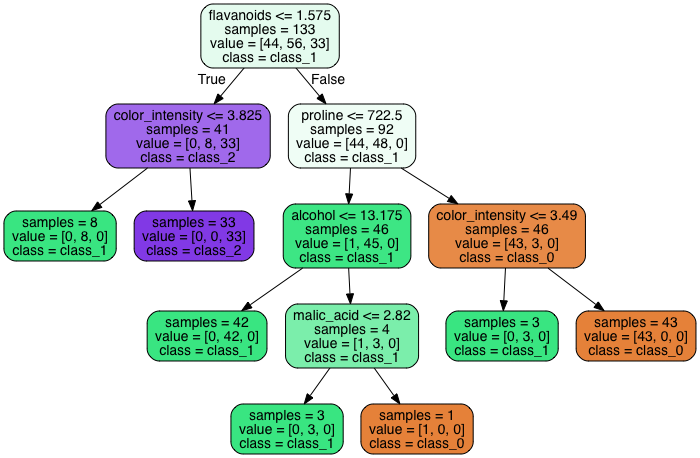

In [13]:
# 直接顯示決策樹
from IPython.display import Image
Image(graph.create_png())

## 以下是筆記：

filled=False的情況：

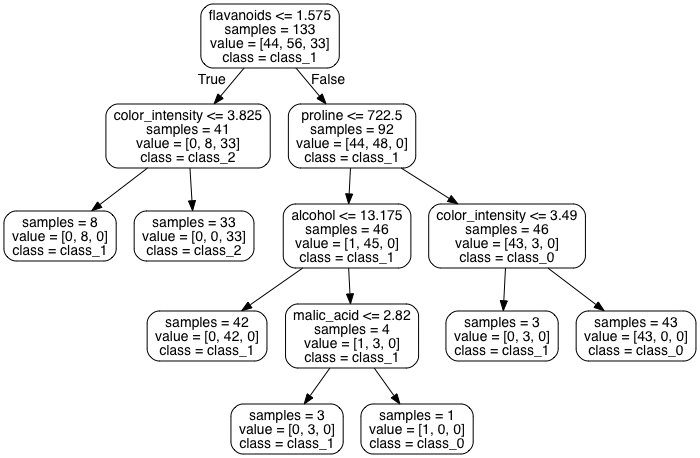

In [14]:
dot_data = StringIO()
tree.export_graphviz(clf,
                    out_file=dot_data,
                    feature_names=wine.feature_names,
                    class_names=wine.target_names,
                    filled=False,
                    rounded=True,
                    impurity=False)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

rounded=False的情況：

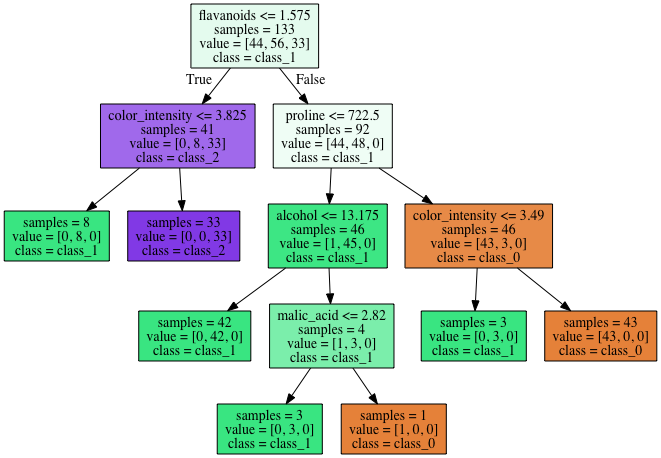

In [15]:
dot_data = StringIO()
tree.export_graphviz(clf,
                    out_file=dot_data,
                    feature_names=wine.feature_names,
                    class_names=wine.target_names,
                    filled=True,
                    rounded=False,
                    impurity=False)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

impurity=True的情況：

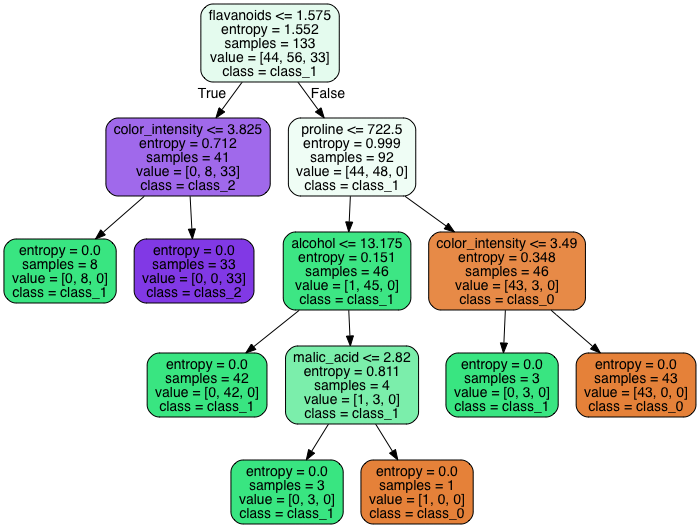

In [16]:
dot_data = StringIO()
tree.export_graphviz(clf,
                    out_file=dot_data,
                    feature_names=wine.feature_names,
                    class_names=wine.target_names,
                    filled=True,
                    rounded=True,
                    impurity=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())